계단 함수 

```python
def step_func(x):
    if x > 0:
        return 1
    return 0
```

numpy 배열을 인자로 받을 수 있는 계단 함수 

```python
def step_func(x):
    y = x > 0
    return y.astype(np.int)
```

In [8]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
y = x > 0
y = y.astype(np.int64)
y

array([0, 1, 1])

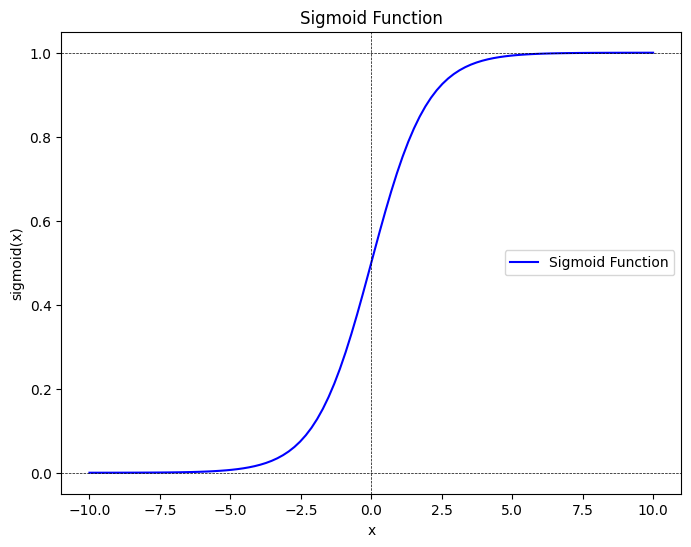

In [3]:
# 시그모이드 함수 구현 및 그래프 그리기
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.figure(figsize=(8,6))
plt.plot(x, y, label="Sigmoid Function", color='blue')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axhline(1, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.show()


In [ ]:
# ReLU(렐루) Rectified Linear Unit 함수 

def relu(x):
    return np.maximum(0, x)

In [9]:
# 다차원 배열

B = np.array([[1,2], [3,4], [5,6]])
print(B)

print(np.ndim(B))

print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [13]:
# 행렬의 내적 
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])

print(np.dot(A,B))

# 2x3 과 3x2 행렬의 내적 
A2 = np.array([[1,2,3], [4,5,6]])
B2 = np.array([[1,2], [3,4], [5,6]])

print("shape of A2", A2.shape)
print("shape of B2", B2.shape)
print(np.dot(A2, B2))


[[19 22]
 [43 50]]
shape of A2 (2, 3)
shape of B2 (3, 2)
[[22 28]
 [49 64]]


In [14]:
import numpy as np

# 신경망의 내적
# 행렬의 내적을 사용하면 Y의 값을 np.dot 이라는 한번의 연산으로 계산이 가능

X = np.array([1,2])
print(X.shape)

W = np.array([[1,3,5], [2,4,6]])
print(W.shape)

Y = np.dot(X, W)

print(Y)

(2,)
(2, 3)
[ 5 11 17]


In [20]:
# 3층 신경망 구성하기

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1 

print(A1)

Z1 = sigmoid(A1)
print(Z1)

W2 = np.array([[0.1, 0.4], [0.2,0.5], [0.3,0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(A2)
print(Z2)

# 출력층의 활성화 함수는 시그모이드가 아닌 다른 걸 사용
# 뭘쓰는지는 풀고자하는 문제의 성질에 맞게 정한다. 
# 회귀에는 항등함수, 분률에는 시그모이드, 다중 클래스 분류에는 소프트맥스 함수를 사용하는것이 일반적이다. 
def identify_function(x):
    return x 

W3 = np.array([[0.1, 0.3], [0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2, W3)  + B3
print(A3)
Y = identify_function(A3)
print(Y)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]
[0.31682708 0.69627909]
[0.31682708 0.69627909]


In [21]:
# 3층 신경망 구현정리

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2,0.5], [0.3,0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])
    return network

def forward(network, x):
    # 신호가 순방향으로 나아감을 말하는 이름
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identify_function(a3)
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


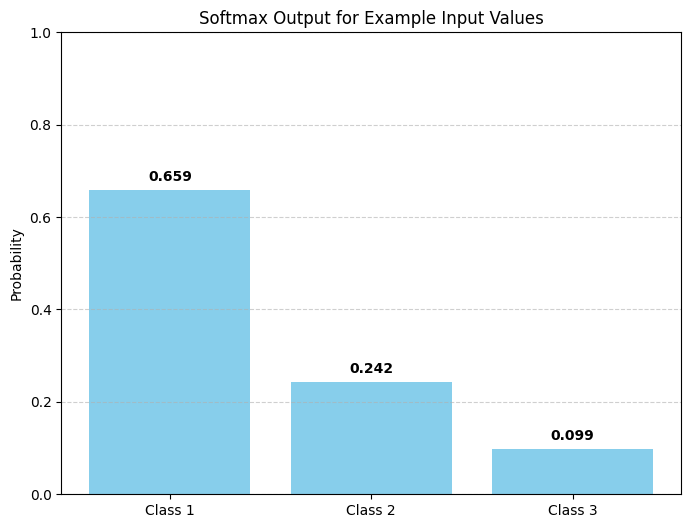

In [25]:
# 소프트맥스 함수

import matplotlib.pyplot as plt 

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return  exp_x / exp_x.sum()

input_values = np.array([2.0, 1.0, 0.1])
softmax_values = softmax(x)

fig, ax = plt.subplots(figsize=(8,6))

# 막대그래프
ax.bar(range(len(input_values)), softmax_values, color='skyblue')
ax.set_xticks(range(len(input_values)))
ax.set_xticklabels([f'Class {i+1}' for i in range(len(input_values))])
ax.set_ylabel('Probability')
ax.set_title('Softmax Output for Example Input Values')


for i, v in enumerate(softmax_values):
    ax.text(i, v + 0.02, f"{v:.3f}", ha='center', fontweight='bold')

plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()